In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
prod_data = pd.read_csv('production_data.csv')
wells_data =  pd.read_csv('wellsData.csv')
op_aliasing_data = pd.read_csv('operator_aliasing.csv')

C:\Users\Nourhan Khaled\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (21,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
# dropping unnecessary columns from tables
cols = ['API', 'Year', 'Month', 'Liquid', 'Gas', 'RatioGasOil']
prod_data = prod_data[cols]

cols = ['API', 'CompletionDate', 'operatorNameIHS', 'BasinName']
wells_data = wells_data[cols]

cols = ['Name', 'Alias']
op_aliasing_data = op_aliasing_data[cols]

In [8]:
# adding zeros to API
prod_data['API'] = (prod_data['API']).astype(str)
prod_data['API'] = prod_data['API'].apply(lambda x: x.zfill(14))

In [9]:
# renaming operators
alias_dict = dict(zip(op_aliasing_data.Name, op_aliasing_data.Alias))
wells_data['operatorNameIHS'] = wells_data['operatorNameIHS'].map(alias_dict).fillna(wells_data['operatorNameIHS'])

In [10]:
idx_max = prod_data.groupby(['API'])['Liquid'].transform('max') == prod_data['Liquid']
max_month_prod_data = prod_data[idx_max].drop_duplicates(subset='API', keep='first', inplace=False)
list_indices = ['API', 'Year', 'Month', 'Liquid']
max_month_prod_data = max_month_prod_data[list_indices]
max_month_prod_data = max_month_prod_data.rename(columns={"Year": "Max_Year", "Month": "Max_Month", "Liquid": "Max_Liquid"})

In [11]:
# merging the two dataframes to get max month and max year and removing rows with months =< peak_month
new_prod_data_orig = prod_data.merge(max_month_prod_data, on='API')

In [12]:
# Remove Pre-Peak Months (clean up)
new_prod_data = new_prod_data_orig[((new_prod_data_orig['Year'] == new_prod_data_orig['Max_Year']))]
new_prod_data = new_prod_data[((new_prod_data['Month'] >= new_prod_data['Max_Month']))]
new_prod_data2 = new_prod_data_orig[((new_prod_data_orig['Year'] > new_prod_data_orig['Max_Year']))]
new_prod_data3 = new_prod_data.append(new_prod_data2)

In [13]:
def calc_month_index(max_year, max_month, year, month):
    return (12 - max_month + (year - max_year - 1)*12 + month) * (year != max_year) + (year == max_year) * (month - max_month) + 1 

In [14]:
new_prod_data3['index'] = calc_month_index(new_prod_data3['Max_Year'], new_prod_data3['Max_Month'], new_prod_data3['Year'], new_prod_data3['Month'])
indexed_prod_data = new_prod_data3

# Problems encountered

## 1) 0 max liquid production, fixed by setting first month as peek month
## 2) missing months data in indexing months, fixed by super smart indexing equation
## 3) missing month data in plotting, will be fixed by moving average inshaAllah
## 4) UNKNOWN alias and operator


In [15]:
# TODO: disregard wells/basins? with less than 5 years production

In [16]:
wells_data_4basins = wells_data[wells_data['BasinName'] == 'DENVER BASIN']
wells_data_4basins = wells_data_4basins.append(wells_data[wells_data['BasinName'] == 'PERMIAN BASIN'])
wells_data_4basins = wells_data_4basins.append(wells_data[wells_data['BasinName'] == 'ANADARKO BASIN'])
wells_data_4basins = wells_data_4basins.append(wells_data[wells_data['BasinName'] == 'WILLISTON BASIN'])
wells_data_4basins['API'] = wells_data_4basins['API'].astype(str)

In [17]:
indexed_wells_4basins = wells_data_4basins.merge(indexed_prod_data, on='API')

In [18]:
print(indexed_wells_4basins.groupby('BasinName'))
indexed_wells_4basins.groupby('index').mean()


,Year,Month,Liquid,Gas,RatioGasOil,Max_Year,Max_Month,Max_Liquid
index,,,,,,,,
1,2014.613520,6.619033,15428.412937,32365.166470,20.978464,2014.613520,6.619033,15456.562820
2,2014.646258,6.635406,10944.573153,28074.962165,34.558799,2014.568045,6.573960,15427.611918
3,2014.676946,6.731089,8761.499430,24687.468371,28.079652,2014.526205,6.539976,15330.812627
4,2014.724558,6.598955,7482.095690,22267.534810,22.997497,2014.481615,6.514266,15235.500502
5,2014.743331,6.690996,6509.327947,20386.148758,22.009226,2014.426081,6.497996,15095.724847
6,2014.773796,6.607593,5784.766053,18762.220045,27.492357,2014.366370,6.496713,14948.493361
7,2014.812368,6.502375,5200.973105,17320.187025,32.456917,2014.311655,6.510927,14824.089316
8,2014.830520,6.552731,4763.084202,16280.719173,37.538887,2014.248253,6.539938,14692.736105
9,2014.864379,6.443412,4372.063286,15234.442346,46.640951,2014.185675,6.587862,14552.775014


In [19]:
indexed_wells_4basins

,API,CompletionDate,operatorNameIHS,BasinName,Year,Month,Liquid,Gas,RatioGasOil,Max_Year,Max_Month,Max_Liquid,index
0,49021207420000,2011-07-01,NANKE ENERGY LLC,DENVER BASIN,2011,7,0,47,0.000000,2011,7,0,1
1,49021207420000,2011-07-01,NANKE ENERGY LLC,DENVER BASIN,2011,8,0,0,0.000000,2011,7,0,2
2,49021207420000,2011-07-01,NANKE ENERGY LLC,DENVER BASIN,2011,9,0,14,0.000000,2011,7,0,3
3,49021207420000,2011-07-01,NANKE ENERGY LLC,DENVER BASIN,2011,10,0,100,0.000000,2011,7,0,4
4,49021216140001,2015-09-01,KAISER-FRANCIS,DENVER BASIN,2016,1,4139,1627,0.393090,2016,1,4139,1
5,49021216140001,2015-09-01,KAISER-FRANCIS,DENVER BASIN,2016,2,3961,1101,0.277960,2016,1,4139,2
6,49021216140001,2015-09-01,KAISER-FRANCIS,DENVER BASIN,2016,3,3555,807,0.227004,2016,1,4139,3
7,49021216140001,2015-09-01,KAISER-FRANCIS,DENVER BASIN,2016,4,3848,1355,0.352131,2016,1,4139,4
8,49021216140001,2015-09-01,KAISER-FRANCIS,DENVER BASIN,2016,5,4111,1855,0.451228,2016,1,4139,5
9,49021216140001,2015-09-01,KAISER-FRANCIS,DENVER BASIN,2016,6,1728,1249,0.722801,2016,1,4139,6


In [34]:
def mean_basin(basin, index, table):
    group = table[(table['BasinName'] == basin) & (table['index'] == index)] 
    return group["Liquid"].mean()

def median_basin(basin, index, table):
    group = table[(table['BasinName'] == basin) & (table['index'] == index)] 
    return group["Liquid"].median()

def percentile(basin, index, table):
    group = table[(table['BasinName'] == basin) & (table['index'] == index)] 
    return group["Liquid"].quantile(.9)

def liquid(basin, index, table):
    group = table[(table['BasinName'] == basin) & (table['index'] == index)] 
    return group['Liquid']

In [35]:
indices = np.arange(36) + 1
mean = [mean_basin("ANADARKO BASIN", x, indexed_wells_4basins) for x in indices]
median = [median_basin("ANADARKO BASIN", x, indexed_wells_4basins) for x in indices]
perct = [percentile("ANADARKO BASIN", x, indexed_wells_4basins) for x in indices]


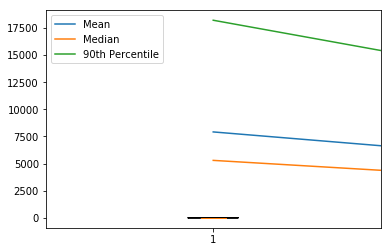

In [39]:
plt.plot(indices, mean, label="Mean")
plt.plot(indices, median, label="Median")
plt.plot(indices, perct, label="90th Percentile")
plt.boxplot(indices, liquid)
plt.legend()

In [44]:
#TODO: imma complete the previous parts and let you know if I get stuck
liq = [np.array(liquid("ANADARKO BASIN", x, indexed_wells_4basins)) for x in indices]
plt.boxplot(indices, liq)


[array([1808, 2638, 1134, ..., 5559, 9730, 8050], dtype=int64),
 array([1451, 1602,  573, ..., 3342, 8238, 6262], dtype=int64),
 array([1650, 1937,  191, ..., 5948, 2504,    0], dtype=int64),
 array([1430, 1596,  392, ..., 5486, 1655,    0], dtype=int64),
 array([1097, 1571,  538, ..., 6245, 4452,  866], dtype=int64),
 array([ 927, 1558,  367, ..., 3017, 6944,  903], dtype=int64),
 array([ 521, 1384,  180, ..., 4071,    0,    0], dtype=int64),
 array([ 962, 1805,  179, ..., 3890, 6300,  492], dtype=int64),
 array([1136, 1189, 1084, ..., 1787, 6414,    0], dtype=int64),
 array([ 515, 1207,  180, ..., 1744, 5485,    0], dtype=int64),
 array([ 361, 1362,  338, ..., 1578, 5919,    0], dtype=int64),
 array([ 746, 1203,  180, ..., 1576, 5758,    0], dtype=int64),
 array([ 547, 1193,  180, ..., 1186, 1563,    0], dtype=int64),
 array([ 580,  861,  535, ..., 1255, 5858, 1231], dtype=int64),
 array([ 763, 1210,    0, ..., 1073, 3942, 1197], dtype=int64),
 array([ 580, 1006,    0, ...,  986, 417

{'whiskers': [<matplotlib.lines.Line2D at 0x1cc9dc01748>,
 'caps': [<matplotlib.lines.Line2D at 0x1cc9dbf6048>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cc9dc015f8>],
 'medians': [<matplotlib.lines.Line2D at 0x1cc9dbf6898>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cc9dbf6cc0>],
 'means': []}

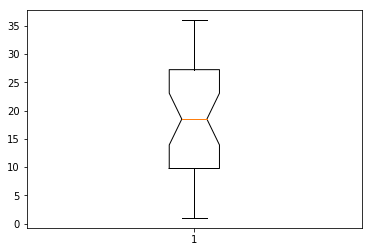